In [ ]:
from google.colab import  drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Step 0
# import libraries 
import pandas as pd
import os
import math
import numpy as np
%matplotlib inline
from matplotlib import pylab as plt
import matplotlib.dates as mdates
import seaborn as sns 
import datetime as dt
from datetime import datetime
from datetime import timedelta
from sklearn import preprocessing, model_selection, metrics


In [ ]:
# Step 1 : Read data
# Import training dataset
data=pd.read_csv("/content/drive/MyDrive/PLC/testdata_20ms_30s_withtime_attr_and_bool (2).csv", encoding = 'unicode_escape')


In [ ]:
data.head()

,date,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14,attr15,attr16,attr17,attr18,Energy,attr19,bool1,bool2,bool3,bool4,bool5,bool6,bool7,bool8,bool9,bool10
0,1/11/2016 17:00,1.140000,5.140000,191.9000,8.100000,893.0000,9.310000,8.634000,1145.890,1985.320,16.37800,27.59000,14.67000,0.150000,6.780000,0.450000,20.60000,3.450000,22.87000,422.5600,24.85000,0,0,0,1,0,0,0,0,1,1
1,1/11/2016 17:10,1.182868,5.258246,182.5786,8.254593,852.2147,9.377644,8.936155,1194.627,1999.573,16.21606,26.34337,14.12859,0.152914,6.997405,0.430321,20.57030,3.423302,22.52233,404.4023,23.73808,1,0,1,1,0,1,1,0,1,0
2,1/11/2016 17:20,1.164122,5.023983,188.6585,8.103024,870.6929,9.717017,8.610727,1173.765,1992.357,16.05478,26.95175,14.20364,0.150258,6.784481,0.418673,20.27469,3.408989,22.81782,416.4938,24.45771,0,0,1,1,1,0,1,1,1,1
3,1/11/2016 17:30,1.118057,5.133799,196.8058,7.920950,912.6129,9.643086,8.204694,1219.127,2047.659,16.84436,26.74997,14.78967,0.156325,6.965767,0.424453,21.05998,3.512967,23.89848,432.8327,23.29208,1,1,0,0,1,1,0,1,1,0
4,1/11/2016 17:40,1.136500,4.960430,204.8717,7.905703,935.8150,9.189082,8.464020,1159.439,1999.635,17.38962,27.33342,15.10489,0.149497,7.065257,0.412433,21.38825,3.641460,24.25055,446.5339,24.38764,0,0,0,1,1,1,0,1,0,1


In [ ]:
print("size/shape of the dataset",data.shape)
print("checking for null values",data.isnull().sum())
print("checking Data_Type",data.dtypes)

size/shape of the dataset (1501, 31)
checking for null values date      0
attr1     0
attr2     0
attr3     0
attr4     0
attr5     0
attr6     0
attr7     0
attr8     0
attr9     0
attr10    0
attr11    0
attr12    0
attr13    0
attr14    0
attr15    0
attr16    0
attr17    0
attr18    0
Energy    0
attr19    0
bool1     0
bool2     0
bool3     0
bool4     0
bool5     0
bool6     0
bool7     0
bool8     0
bool9     0
bool10    0
dtype: int64
checking Data_Type date       object
attr1     float64
attr2     float64
attr3     float64
attr4     float64
attr5     float64
attr6     float64
attr7     float64
attr8     float64
attr9     float64
attr10    float64
attr11    float64
attr12    float64
attr13    float64
attr14    float64
attr15    float64
attr16    float64
attr17    float64
attr18    float64
Energy    float64
attr19    float64
bool1       int64
bool2       int64
bool3       int64
bool4       int64
bool5       int64
bool6       int64
bool7       int64
bool8       int64
bool9       

In [ ]:
#Number of null values in all columns
data.isnull().sum().sort_values(ascending = True)

date      0
bool8     0
bool7     0
bool6     0
bool5     0
bool4     0
bool3     0
bool2     0
bool1     0
attr19    0
Energy    0
attr18    0
attr17    0
attr16    0
bool9     0
attr15    0
attr13    0
attr12    0
attr11    0
attr10    0
attr9     0
attr8     0
attr7     0
attr6     0
attr5     0
attr4     0
attr3     0
attr2     0
attr1     0
attr14    0
bool10    0
dtype: int64

In [ ]:
#data.size
1501*31

46531

In [ ]:
data.ndim

2

In [ ]:
data.shape

(1501, 31)

In [ ]:
from matplotlib import pylab as plt
import plotly.express as px
from plotly.subplots import make_subplots
fig=px.bar(x=data.index,y=data["Energy"])
fig.update_layout(title="Distribution plot for Energe",
xaxis_title="Date",yaxis_title="Number of data",)
fig.show()
plt.savefig('01br.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.model_selection import train_test_split

# 75% of the data is usedfor the training of the models and the rest is used for testing
train, test = train_test_split(data,test_size=0.25,random_state=40)
train
#train.shape
#test.shape


,date,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14,attr15,attr16,attr17,attr18,Energy,attr19,bool1,bool2,bool3,bool4,bool5,bool6,bool7,bool8,bool9,bool10
407,1/14/2016 12:50,4.528657,3.609933,138.71520,9.061323,1957.3190,5.315396,5.549860,970.8189,1662.0190,14.62255,21.98678,8.959275,0.088295,7.981981,0.212244,22.16526,3.545093,9.038780,214.66400,5.261412,1,1,1,0,1,0,0,0,0,1
62,1/12/2016 3:20,1.150736,6.101673,237.01040,7.794416,1128.1200,11.508870,5.846688,896.1932,1850.2860,15.12785,33.33391,12.551940,0.105124,7.566736,0.397966,24.97141,4.796430,16.809270,430.00020,23.497870,1,0,0,1,0,1,0,1,1,1
703,1/16/2016 14:10,2.552958,3.499081,160.91480,10.755410,1230.8690,2.826635,3.491632,359.1400,1555.3500,38.36111,26.84245,14.623310,0.030090,3.856587,0.335582,22.80905,4.888247,9.247042,168.64630,5.802007,1,1,0,1,1,1,1,0,1,1
388,1/14/2016 9:40,4.061093,3.092904,134.89830,6.229366,1635.6570,5.934859,5.430026,1014.1750,1583.1370,14.80993,24.74317,10.364550,0.107801,8.485667,0.197007,23.13999,4.026678,9.713817,243.94560,4.478150,0,1,0,1,0,1,0,0,1,1
30,1/11/2016 22:00,1.069644,5.135803,203.10060,9.418522,1232.6220,10.271830,7.520697,1021.5620,2454.2030,15.95107,33.36382,14.170020,0.123513,9.427437,0.362582,20.74200,4.646159,22.867200,324.28590,21.543500,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,1/18/2016 18:20,4.207291,4.784613,147.54660,8.420452,447.2104,2.504738,5.099825,410.9044,868.1072,75.68394,79.43309,8.055604,0.030706,4.495191,0.572659,25.34116,8.645483,4.115177,112.37120,1.971166,1,1,1,1,1,0,0,1,1,1
165,1/12/2016 20:30,1.290018,5.982666,258.24800,4.210567,1167.3660,9.356843,6.928984,1242.1880,1856.4090,13.32152,39.09932,11.922140,0.159411,8.364981,0.367268,21.02887,3.708899,10.827000,420.32620,12.595920,0,0,1,0,0,1,0,1,0,0
7,1/11/2016 18:10,1.068502,5.119427,202.09040,8.022943,1037.0410,9.519333,8.370392,1094.3070,1925.1470,15.87403,28.35799,16.350480,0.140783,7.861036,0.381212,19.88895,3.890863,25.869030,401.69190,24.028750,1,1,1,1,1,0,0,1,1,1
219,1/13/2016 5:30,1.626885,4.581440,358.67790,4.049171,1332.9780,7.562439,9.908283,876.5812,1672.9640,14.31335,29.96581,17.601480,0.209196,7.146055,0.280729,22.70075,5.775879,9.541043,270.59980,7.292757,0,0,0,0,1,1,1,0,0,1


In [ ]:
# Divide the columns based on type for clear column management 

col_time=["date"]

col_temp = ["attr1","attr2","attr3","attr4","attr5","attr6","attr7","attr8","attr9","attr10","attr11","attr12","attr13","attr14","attr15","attr16","attr17","attr18","attr19"]

col_bool = ["bool1","bool2","bool3","bool4","bool5","bool6","bool7","bool8","bool9","bool10"]

col_target = ["Energy"]

In [ ]:
data.set_index('date',inplace=True)

In [ ]:
# Seperate dependent and independent variables 
feature_vars = train[ col_time + col_temp + col_bool ]   # independent variables
target_vars = train[col_target]   # dependent variables

In [ ]:
# Check the distribution of values in Energy column
feature_vars.attr1.value_counts()

1.617885    1
3.794624    1
5.855060    1
1.165705    1
2.006164    1
           ..
4.754252    1
3.599920    1
3.622531    1
0.953121    1
2.431419    1
Name: attr1, Length: 1125, dtype: int64

In [ ]:
# Check the distribution of values in Energy column
target_vars.Energy.value_counts()

120.00430    1
50.34970     1
48.33352     1
51.82558     1
166.04640    1
            ..
239.59730    1
223.12510    1
164.20000    1
170.14230    1
48.71137     1
Name: Energy, Length: 1125, dtype: int64

**Data Visualization**

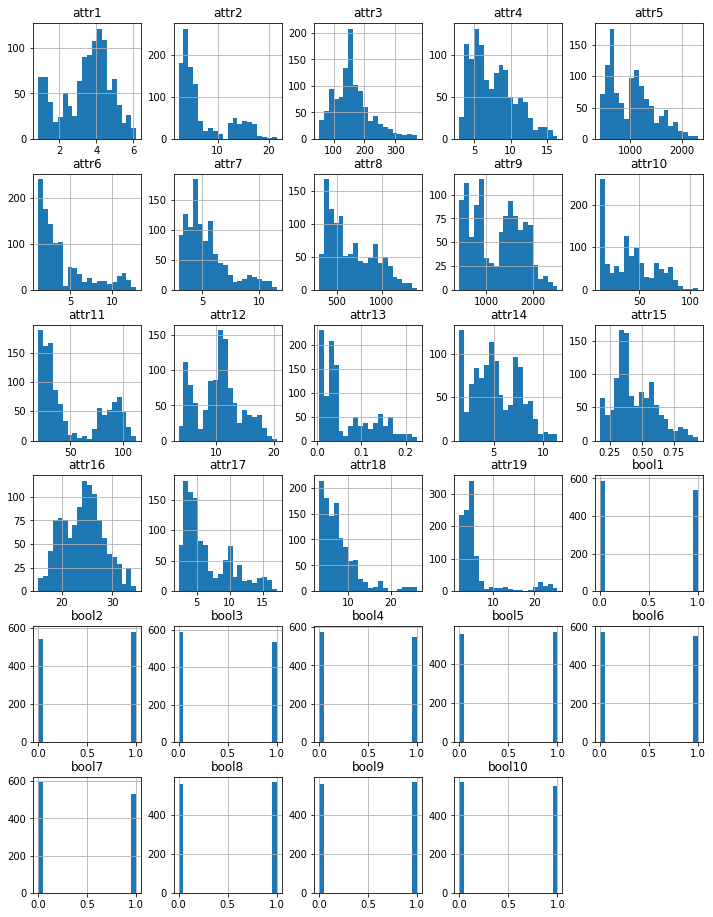

In [ ]:
# Histogram of all the features to understand the distribution
# Overview of the distribution of values of each feature in the dataset 
feature_vars.hist(bins = 20 , figsize= (12,16)) ;

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

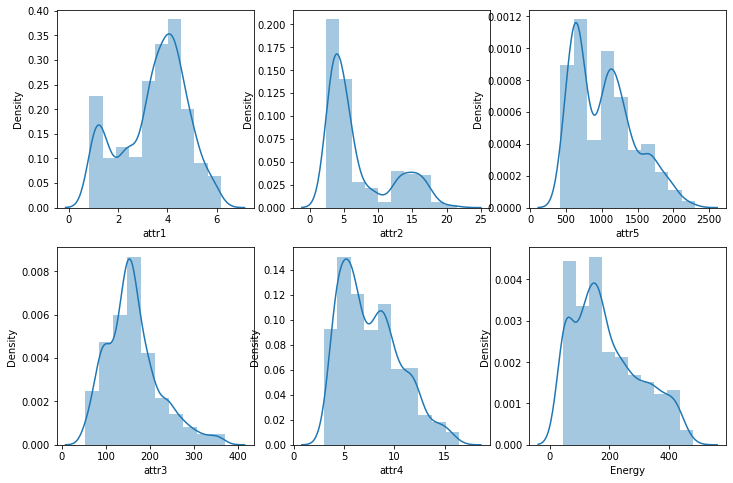

In [ ]:
# focussed displots for attr1 , attr2 , attr3, attr4,attr5, Energy due to irregular distribution
f, ax = plt.subplots(2,3,figsize=(12,8))
vis1 = sns.distplot(feature_vars["attr1"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(feature_vars["attr2"],bins=10, ax=ax[0][1])
vis3 = sns.distplot(feature_vars["attr3"],bins=10, ax=ax[1][0])
vis4 = sns.distplot(feature_vars["attr4"],bins=10, ax=ax[1][1])
vis4 = sns.distplot(feature_vars["attr5"],bins=10, ax=ax[0][2])
vis5 = sns.distplot(target_vars["Energy"],bins=10, ax=ax[1][2])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



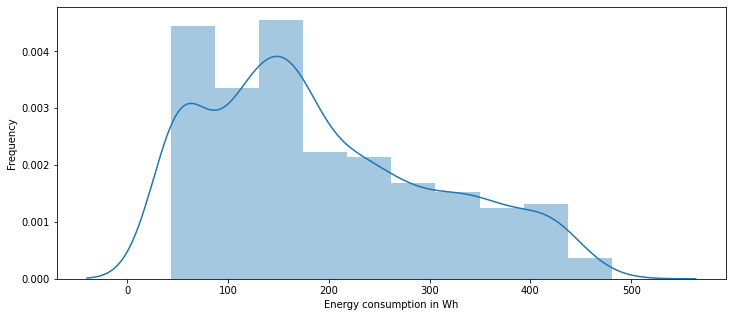

In [ ]:
# Distribution of values in Energy column
f = plt.figure(figsize=(12,5))
plt.xlabel('Energy consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(target_vars , bins=10 ) ;

In [ ]:
#Energy column range with consumption less than 200 Wh 
print('Percentage of the Energy consumption is less than 200 Wh') # A watt-hour (Wh) is a unit of energy.
print(((target_vars[target_vars <= 200].count()) / (len(target_vars)))*100 )

Percentage of the Energy consumption is less than 200 Wh
Energy    59.911111
dtype: float64


# Correlation plot

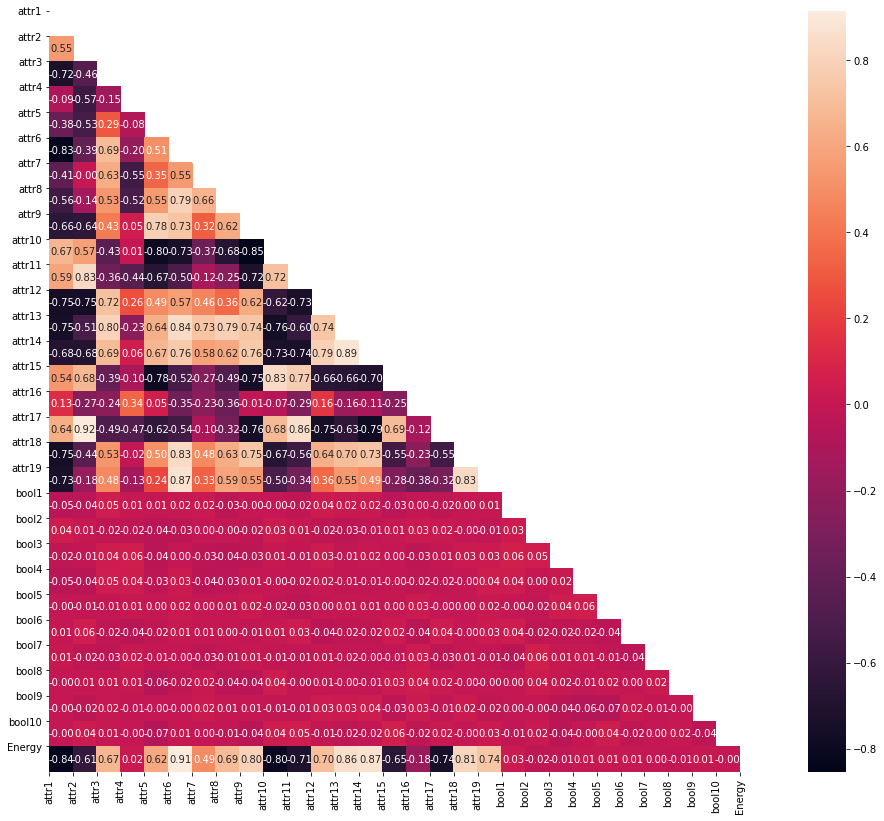

In [ ]:
# Use the bool , temperature (attr) , Energy column to see the correlation
train_corr = train[col_temp + col_bool +col_target]
corr = train_corr.corr()
# Mask the repeated values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
  
f, ax = plt.subplots(figsize=(16, 14))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

# Data Pre processing


In [ ]:
#Split training dataset into independent and dependent varibales
train_X = train[feature_vars.columns]   # independent
train_y = train[target_vars.columns]    # dependent
train_X.drop(['date'], axis=1, inplace=True)

train_X         # The actual training dataset from (the sample data 75%) (in the second stage  1125 rows × 29 columns without date column and Energy column)
#train_y        # The actual training dataset from the sample data (in the second stage  1125 rows × 1 columns)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14,attr15,attr16,attr17,attr18,attr19,bool1,bool2,bool3,bool4,bool5,bool6,bool7,bool8,bool9,bool10
407,4.528657,3.609933,138.71520,9.061323,1957.3190,5.315396,5.549860,970.8189,1662.0190,14.62255,21.98678,8.959275,0.088295,7.981981,0.212244,22.16526,3.545093,9.038780,5.261412,1,1,1,0,1,0,0,0,0,1
62,1.150736,6.101673,237.01040,7.794416,1128.1200,11.508870,5.846688,896.1932,1850.2860,15.12785,33.33391,12.551940,0.105124,7.566736,0.397966,24.97141,4.796430,16.809270,23.497870,1,0,0,1,0,1,0,1,1,1
703,2.552958,3.499081,160.91480,10.755410,1230.8690,2.826635,3.491632,359.1400,1555.3500,38.36111,26.84245,14.623310,0.030090,3.856587,0.335582,22.80905,4.888247,9.247042,5.802007,1,1,0,1,1,1,1,0,1,1
388,4.061093,3.092904,134.89830,6.229366,1635.6570,5.934859,5.430026,1014.1750,1583.1370,14.80993,24.74317,10.364550,0.107801,8.485667,0.197007,23.13999,4.026678,9.713817,4.478150,0,1,0,1,0,1,0,0,1,1
30,1.069644,5.135803,203.10060,9.418522,1232.6220,10.271830,7.520697,1021.5620,2454.2030,15.95107,33.36382,14.170020,0.123513,9.427437,0.362582,20.74200,4.646159,22.867200,21.543500,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,4.207291,4.784613,147.54660,8.420452,447.2104,2.504738,5.099825,410.9044,868.1072,75.68394,79.43309,8.055604,0.030706,4.495191,0.572659,25.34116,8.645483,4.115177,1.971166,1,1,1,1,1,0,0,1,1,1
165,1.290018,5.982666,258.24800,4.210567,1167.3660,9.356843,6.928984,1242.1880,1856.4090,13.32152,39.09932,11.922140,0.159411,8.364981,0.367268,21.02887,3.708899,10.827000,12.595920,0,0,1,0,0,1,0,1,0,0
7,1.068502,5.119427,202.09040,8.022943,1037.0410,9.519333,8.370392,1094.3070,1925.1470,15.87403,28.35799,16.350480,0.140783,7.861036,0.381212,19.88895,3.890863,25.869030,24.028750,1,1,1,1,1,0,0,1,1,1
219,1.626885,4.581440,358.67790,4.049171,1332.9780,7.562439,9.908283,876.5812,1672.9640,14.31335,29.96581,17.601480,0.209196,7.146055,0.280729,22.70075,5.775879,9.541043,7.292757,0,0,0,0,1,1,1,0,0,1


In [ ]:
train_X.columns     # show the train columns
#train_y.columns    # show the train columns

Index(['attr1', 'attr2', 'attr3', 'attr4', 'attr5', 'attr6', 'attr7', 'attr8',
       'attr9', 'attr10', 'attr11', 'attr12', 'attr13', 'attr14', 'attr15',
       'attr16', 'attr17', 'attr18', 'attr19', 'bool1', 'bool2', 'bool3',
       'bool4', 'bool5', 'bool6', 'bool7', 'bool8', 'bool9', 'bool10'],
      dtype='object')

In [ ]:
#Split testing dataset into independent and dependent varibales

test_X = test[feature_vars.columns]   # independent
test_y = test[target_vars.columns]     # dependent (Energy column)

test_X    # The actual testing dataset from the sample data   (in the second stage  376 rows × 30 columns without  Energy column)
#test_y     # # The actual testing dataset from the sample data   (in the second stage  376 rows × 1 columns)

,date,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14,attr15,attr16,attr17,attr18,attr19,bool1,bool2,bool3,bool4,bool5,bool6,bool7,bool8,bool9,bool10
847,1/17/2016 14:10,3.965354,4.917572,174.85270,11.781440,586.4275,2.398635,4.012640,429.9024,857.7618,52.64806,35.42836,11.247870,0.039120,5.564633,0.345426,27.75060,4.727629,6.385937,3.945695,1,0,0,0,0,0,1,0,1,1
1335,1/20/2016 23:30,5.482907,15.354040,62.63193,2.927616,595.8983,1.644634,5.438267,485.4902,500.4801,60.75351,84.69742,5.173926,0.008430,2.064202,0.634796,27.87857,14.899850,4.026894,4.095331,0,1,0,0,0,1,0,1,1,0
1021,1/18/2016 19:10,4.559379,5.065438,149.08470,9.674106,434.5733,2.587971,4.797611,420.5661,848.2876,76.16073,77.84153,8.034773,0.028565,4.712727,0.602299,24.38844,8.296350,3.840825,1.993659,0,0,0,1,0,0,1,1,1,1
998,1/18/2016 15:20,4.344412,5.049129,186.67920,8.578504,444.0521,2.360206,5.948142,427.6164,946.7853,73.69302,81.68349,8.969387,0.031679,4.457261,0.617033,26.98486,5.960808,4.425125,2.164943,0,1,1,0,0,1,0,1,1,0
621,1/16/2016 0:30,3.182564,3.484509,86.27037,15.432200,1021.7240,3.650456,3.739743,476.4725,1422.2860,25.25433,21.84484,11.186950,0.040660,4.737278,0.516631,31.80449,3.851866,6.235885,5.298306,1,0,1,1,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,1/11/2016 21:20,0.972674,5.118910,197.18650,9.032269,1113.3090,11.381270,7.368390,1044.4410,2365.5340,16.49108,30.30088,15.502480,0.116287,9.296579,0.357277,18.92828,4.271657,23.663400,21.744750,1,0,0,1,0,1,1,1,1,0
735,1/16/2016 19:30,3.059750,3.862740,177.03440,7.501666,1271.3730,2.387735,3.599979,380.8096,1294.7510,40.07922,34.27322,12.658260,0.031320,3.115664,0.293372,29.11262,6.201856,7.333262,6.832113,1,0,1,1,0,1,1,0,0,0
722,1/16/2016 17:20,2.659443,3.682884,152.37120,9.031841,1240.0140,2.861724,3.124007,388.5875,1429.5600,37.76090,29.94952,13.827680,0.032033,3.515862,0.341469,28.34819,5.530399,7.921289,6.262127,1,0,0,0,1,0,1,1,0,0
466,1/14/2016 22:40,4.850270,3.960358,148.59720,6.335395,1909.8190,6.230454,4.810342,690.3831,1825.1100,23.14869,20.97811,8.781181,0.079011,6.930658,0.408524,21.42539,2.335020,8.478312,5.423478,0,1,1,1,1,0,0,0,1,0


In [ ]:
# Due to conlusion made above below columns are removed
test_X.drop(["date"], axis=1, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
test_X    # the prevoius testing dataset from the sample data 25 %) (in the second stage  376 rows × 29 columns without without date column  Energy column)

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14,attr15,attr16,attr17,attr18,attr19,bool1,bool2,bool3,bool4,bool5,bool6,bool7,bool8,bool9,bool10
847,3.965354,4.917572,174.85270,11.781440,586.4275,2.398635,4.012640,429.9024,857.7618,52.64806,35.42836,11.247870,0.039120,5.564633,0.345426,27.75060,4.727629,6.385937,3.945695,1,0,0,0,0,0,1,0,1,1
1335,5.482907,15.354040,62.63193,2.927616,595.8983,1.644634,5.438267,485.4902,500.4801,60.75351,84.69742,5.173926,0.008430,2.064202,0.634796,27.87857,14.899850,4.026894,4.095331,0,1,0,0,0,1,0,1,1,0
1021,4.559379,5.065438,149.08470,9.674106,434.5733,2.587971,4.797611,420.5661,848.2876,76.16073,77.84153,8.034773,0.028565,4.712727,0.602299,24.38844,8.296350,3.840825,1.993659,0,0,0,1,0,0,1,1,1,1
998,4.344412,5.049129,186.67920,8.578504,444.0521,2.360206,5.948142,427.6164,946.7853,73.69302,81.68349,8.969387,0.031679,4.457261,0.617033,26.98486,5.960808,4.425125,2.164943,0,1,1,0,0,1,0,1,1,0
621,3.182564,3.484509,86.27037,15.432200,1021.7240,3.650456,3.739743,476.4725,1422.2860,25.25433,21.84484,11.186950,0.040660,4.737278,0.516631,31.80449,3.851866,6.235885,5.298306,1,0,1,1,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,0.972674,5.118910,197.18650,9.032269,1113.3090,11.381270,7.368390,1044.4410,2365.5340,16.49108,30.30088,15.502480,0.116287,9.296579,0.357277,18.92828,4.271657,23.663400,21.744750,1,0,0,1,0,1,1,1,1,0
735,3.059750,3.862740,177.03440,7.501666,1271.3730,2.387735,3.599979,380.8096,1294.7510,40.07922,34.27322,12.658260,0.031320,3.115664,0.293372,29.11262,6.201856,7.333262,6.832113,1,0,1,1,0,1,1,0,0,0
722,2.659443,3.682884,152.37120,9.031841,1240.0140,2.861724,3.124007,388.5875,1429.5600,37.76090,29.94952,13.827680,0.032033,3.515862,0.341469,28.34819,5.530399,7.921289,6.262127,1,0,0,0,1,0,1,1,0,0
466,4.850270,3.960358,148.59720,6.335395,1909.8190,6.230454,4.810342,690.3831,1825.1100,23.14869,20.97811,8.781181,0.079011,6.930658,0.408524,21.42539,2.335020,8.478312,5.423478,0,1,1,1,1,0,0,0,1,0


In [ ]:
test_X.columns
#test_y.columns

Index(['attr1', 'attr2', 'attr3', 'attr4', 'attr5', 'attr6', 'attr7', 'attr8',
       'attr9', 'attr10', 'attr11', 'attr12', 'attr13', 'attr14', 'attr15',
       'attr16', 'attr17', 'attr18', 'attr19', 'bool1', 'bool2', 'bool3',
       'bool4', 'bool5', 'bool6', 'bool7', 'bool8', 'bool9', 'bool10'],
      dtype='object')

In [ ]:
# Feature Scaling
# Feature scaling is a method used to normalize the range of independent variables or features of data.
# In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.
# Feature scaling would help multiple independent variables all to be in the same range, for example- centered around 0 or in the range (0,1) depending on the scaling technique.
# The two most common scaling techniques Normalization (MinMaxScaler) and Standardization ( StandardScaler) on the dataset.
# Normalization known as min-max scaling or min-max normalization, it is the simplest method and consists of rescaling the range of features to scale the range in [0, 1].
# Feature standardization ( StandardScaler) makes the values of each feature in the data have zero mean and unit variance.

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# Create test and training set by including Energy column

train = train[list(train_X.columns.values) + col_target ]  # with  Energy column

test = test[list(test_X.columns.values) + col_target ]     #  with Energy column

train   # print the actuall values for training from sample data within Energy column ( 1125 rows × 30 columns) 
#train.head()    # the first five columns

#test            # print the actuall values for testing from sample data within Energy column ( 376 rows × 30 columns)
#test.head()     # the first five test columns


,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14,attr15,attr16,attr17,attr18,attr19,bool1,bool2,bool3,bool4,bool5,bool6,bool7,bool8,bool9,bool10,Energy
407,4.528657,3.609933,138.71520,9.061323,1957.3190,5.315396,5.549860,970.8189,1662.0190,14.62255,21.98678,8.959275,0.088295,7.981981,0.212244,22.16526,3.545093,9.038780,5.261412,1,1,1,0,1,0,0,0,0,1,214.66400
62,1.150736,6.101673,237.01040,7.794416,1128.1200,11.508870,5.846688,896.1932,1850.2860,15.12785,33.33391,12.551940,0.105124,7.566736,0.397966,24.97141,4.796430,16.809270,23.497870,1,0,0,1,0,1,0,1,1,1,430.00020
703,2.552958,3.499081,160.91480,10.755410,1230.8690,2.826635,3.491632,359.1400,1555.3500,38.36111,26.84245,14.623310,0.030090,3.856587,0.335582,22.80905,4.888247,9.247042,5.802007,1,1,0,1,1,1,1,0,1,1,168.64630
388,4.061093,3.092904,134.89830,6.229366,1635.6570,5.934859,5.430026,1014.1750,1583.1370,14.80993,24.74317,10.364550,0.107801,8.485667,0.197007,23.13999,4.026678,9.713817,4.478150,0,1,0,1,0,1,0,0,1,1,243.94560
30,1.069644,5.135803,203.10060,9.418522,1232.6220,10.271830,7.520697,1021.5620,2454.2030,15.95107,33.36382,14.170020,0.123513,9.427437,0.362582,20.74200,4.646159,22.867200,21.543500,0,0,0,0,1,1,0,0,0,1,324.28590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,4.207291,4.784613,147.54660,8.420452,447.2104,2.504738,5.099825,410.9044,868.1072,75.68394,79.43309,8.055604,0.030706,4.495191,0.572659,25.34116,8.645483,4.115177,1.971166,1,1,1,1,1,0,0,1,1,1,112.37120
165,1.290018,5.982666,258.24800,4.210567,1167.3660,9.356843,6.928984,1242.1880,1856.4090,13.32152,39.09932,11.922140,0.159411,8.364981,0.367268,21.02887,3.708899,10.827000,12.595920,0,0,1,0,0,1,0,1,0,0,420.32620
7,1.068502,5.119427,202.09040,8.022943,1037.0410,9.519333,8.370392,1094.3070,1925.1470,15.87403,28.35799,16.350480,0.140783,7.861036,0.381212,19.88895,3.890863,25.869030,24.028750,1,1,1,1,1,0,0,1,1,1,401.69190
219,1.626885,4.581440,358.67790,4.049171,1332.9780,7.562439,9.908283,876.5812,1672.9640,14.31335,29.96581,17.601480,0.209196,7.146055,0.280729,22.70075,5.775879,9.541043,7.292757,0,0,0,0,1,1,1,0,0,1,270.59980


In [ ]:
test
#test.head()   # the first five actual values testing columns

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14,attr15,attr16,attr17,attr18,attr19,bool1,bool2,bool3,bool4,bool5,bool6,bool7,bool8,bool9,bool10,Energy
847,3.965354,4.917572,174.85270,11.781440,586.4275,2.398635,4.012640,429.9024,857.7618,52.64806,35.42836,11.247870,0.039120,5.564633,0.345426,27.75060,4.727629,6.385937,3.945695,1,0,0,0,0,0,1,0,1,1,151.22000
1335,5.482907,15.354040,62.63193,2.927616,595.8983,1.644634,5.438267,485.4902,500.4801,60.75351,84.69742,5.173926,0.008430,2.064202,0.634796,27.87857,14.899850,4.026894,4.095331,0,1,0,0,0,1,0,1,1,0,52.69395
1021,4.559379,5.065438,149.08470,9.674106,434.5733,2.587971,4.797611,420.5661,848.2876,76.16073,77.84153,8.034773,0.028565,4.712727,0.602299,24.38844,8.296350,3.840825,1.993659,0,0,0,1,0,0,1,1,1,1,103.33470
998,4.344412,5.049129,186.67920,8.578504,444.0521,2.360206,5.948142,427.6164,946.7853,73.69302,81.68349,8.969387,0.031679,4.457261,0.617033,26.98486,5.960808,4.425125,2.164943,0,1,1,0,0,1,0,1,1,0,120.27110
621,3.182564,3.484509,86.27037,15.432200,1021.7240,3.650456,3.739743,476.4725,1422.2860,25.25433,21.84484,11.186950,0.040660,4.737278,0.516631,31.80449,3.851866,6.235885,5.298306,1,0,1,1,1,0,1,0,1,1,244.71460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,0.972674,5.118910,197.18650,9.032269,1113.3090,11.381270,7.368390,1044.4410,2365.5340,16.49108,30.30088,15.502480,0.116287,9.296579,0.357277,18.92828,4.271657,23.663400,21.744750,1,0,0,1,0,1,1,1,1,0,325.22120
735,3.059750,3.862740,177.03440,7.501666,1271.3730,2.387735,3.599979,380.8096,1294.7510,40.07922,34.27322,12.658260,0.031320,3.115664,0.293372,29.11262,6.201856,7.333262,6.832113,1,0,1,1,0,1,1,0,0,0,164.02060
722,2.659443,3.682884,152.37120,9.031841,1240.0140,2.861724,3.124007,388.5875,1429.5600,37.76090,29.94952,13.827680,0.032033,3.515862,0.341469,28.34819,5.530399,7.921289,6.262127,1,0,0,0,1,0,1,1,0,0,164.35230
466,4.850270,3.960358,148.59720,6.335395,1909.8190,6.230454,4.810342,690.3831,1825.1100,23.14869,20.97811,8.781181,0.079011,6.930658,0.408524,21.42539,2.335020,8.478312,5.423478,0,1,1,1,1,0,0,0,1,0,249.10600


In [ ]:
train.columns   #  show the training columns
#test.columns    #  show the training columns 

Index(['attr1', 'attr2', 'attr3', 'attr4', 'attr5', 'attr6', 'attr7', 'attr8',
       'attr9', 'attr10', 'attr11', 'attr12', 'attr13', 'attr14', 'attr15',
       'attr16', 'attr17', 'attr18', 'attr19', 'bool1', 'bool2', 'bool3',
       'bool4', 'bool5', 'bool6', 'bool7', 'bool8', 'bool9', 'bool10',
       'Energy'],
      dtype='object')

In [ ]:
#LSTM uses activation functions sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# Normalize the dataset
# Create Normalize test and training set to hold scaled values

sc_train = pd.DataFrame(columns=train.columns , index=train.index)
#sc_train = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns, index=data.index)
sc_train[sc_train.columns] = sc.fit_transform(train)

sc_test= pd.DataFrame(columns=test.columns , index=test.index)
#sc_test = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns, index=data.index)
sc_test[sc_test.columns] = sc.fit_transform(test)

In [ ]:
# Normalize training 
sc_train           #  training set values after normalize the dataset to hold scaled values
# sc_train.head()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14,attr15,attr16,attr17,attr18,attr19,bool1,bool2,bool3,bool4,bool5,bool6,bool7,bool8,bool9,bool10,Energy
407,0.801708,-0.734280,-0.377857,0.483733,2.186558,0.354453,0.079392,1.190496,0.818551,-1.151637,-0.987238,-0.375300,0.406001,1.199506,-1.434807,-0.516157,-0.853496,0.308031,-0.160072,1.044547,0.965914,1.048275,-0.976281,0.990270,-0.981504,-0.945484,-1.009826,-1.009826,1.015227,0.192345
62,-1.760541,-0.209157,1.247102,0.052143,0.223039,2.365125,0.234539,0.903097,1.179303,-1.129843,-0.604068,0.581715,0.699633,1.020536,-0.294625,0.173347,-0.507714,2.136500,3.202108,1.044547,-1.035289,-0.953948,1.024295,-1.009826,1.018844,-0.945484,0.990270,0.990270,1.015227,2.097836
703,-0.696916,-0.757642,-0.010866,1.060849,0.466346,-0.453508,-0.996414,-1.165203,0.614156,-0.127740,-0.823272,1.133488,-0.609523,-0.578529,-0.677612,-0.357970,-0.482342,0.357037,-0.060404,1.044547,0.965914,-0.953948,1.024295,0.990270,1.018844,1.057660,-1.009826,0.990270,1.015227,-0.214861
388,0.447047,-0.843242,-0.440956,-0.481015,1.424872,0.555557,0.016756,1.357469,0.667400,-1.143555,-0.894160,-0.000962,0.746329,1.416594,-1.528347,-0.276654,-0.720420,0.466873,-0.304478,-0.957353,0.965914,-0.953948,1.024295,-1.009826,1.018844,-0.945484,-1.009826,0.990270,1.015227,0.451456
30,-1.822052,-0.412710,0.686525,0.605419,0.470497,1.963528,1.109519,1.385918,2.336509,-1.094335,-0.603058,1.012740,1.020475,1.822494,-0.511851,-0.865868,-0.549238,3.561988,2.841789,-0.957353,-1.035289,-0.953948,-0.976281,0.990270,1.018844,-0.945484,-1.009826,-1.009826,1.015227,1.162380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,0.557943,-0.486721,-0.231861,0.265411,-1.389335,-0.558010,-0.155835,-0.965848,-0.702717,1.482077,0.952611,-0.616020,-0.598772,-0.303293,0.777853,0.264199,0.555895,-0.850540,-0.766680,1.044547,0.965914,1.048275,1.024295,0.990270,-0.981504,-0.945484,0.990270,0.990270,1.015227,-0.712834
165,-1.654892,-0.234237,1.598190,-1.168749,0.315973,1.666483,0.800240,2.235593,1.191035,-1.207754,-0.409381,0.413949,1.646794,1.364578,-0.483084,-0.795381,-0.808231,0.728816,1.192161,-0.957353,-1.035289,1.048275,-0.976281,-1.009826,1.018844,-0.945484,0.990270,-1.009826,-0.985001,2.012232
7,-1.822918,-0.416161,0.669825,0.129994,0.007367,1.719235,1.553642,1.666073,1.322749,-1.097658,-0.772095,1.593572,1.321789,1.147379,-0.397478,-1.075473,-0.757949,4.268347,3.299984,1.044547,0.965914,1.048275,1.024295,0.990270,-0.981504,-0.945484,0.990270,0.990270,1.015227,1.847339
219,-1.399369,-0.529539,3.258439,-1.223731,0.708137,1.083941,2.357476,0.827567,0.839524,-1.164974,-0.717802,1.926814,2.515427,0.839224,-1.014361,-0.384581,-0.237063,0.426218,0.214439,-0.957353,-1.035289,-0.953948,-0.976281,0.990270,1.018844,1.057660,-1.009826,-1.009826,1.015227,0.687316


In [ ]:
# Normalize testing 
sc_test    #  testing set values after normalize the dataset to hold scaled values
#sc_test.head()  

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14,attr15,attr16,attr17,attr18,attr19,bool1,bool2,bool3,bool4,bool5,bool6,bool7,bool8,bool9,bool10,Energy
847,0.392080,-0.478259,0.123127,1.579145,-0.992337,-0.635101,-0.851914,-0.888052,-0.658347,0.354952,-0.601621,0.246541,-0.486719,0.112234,-0.667312,0.961289,-0.561465,-0.345119,-0.430116,0.989418,-0.948151,-0.978945,-0.973749,-0.958315,-1.118703,0.958315,-0.978945,0.953221,1.021508,-0.396336
1335,1.537822,1.728178,-1.734357,-1.596322,-0.971476,-0.873885,-0.088380,-0.679828,-1.322229,0.662792,1.059846,-1.380955,-1.000094,-1.417132,0.955552,0.992477,2.357770,-0.946589,-0.401353,-1.010695,1.054685,-0.978945,-0.973749,-0.958315,0.893892,-1.043498,1.021508,0.953221,-0.978945,-1.261756
1021,0.840565,-0.446998,-0.303386,0.823339,-1.326823,-0.575140,-0.431501,-0.923024,-0.675951,1.247949,0.828650,-0.614399,-0.663284,-0.259970,0.773300,0.141892,0.462690,-0.994029,-0.805335,-1.010695,-0.948151,-0.978945,1.026959,-0.958315,-1.118703,0.958315,1.021508,0.953221,1.021508,-0.816944
998,0.678266,-0.450446,0.318880,0.430396,-1.305944,-0.647271,0.184697,-0.896615,-0.492928,1.154227,0.958210,-0.363972,-0.611182,-0.371585,0.855929,0.774669,-0.207566,-0.845054,-0.772411,-1.010695,1.054685,1.021508,-0.973749,-0.958315,0.893892,-1.043498,1.021508,0.953221,-0.978945,-0.668181
621,-0.198921,-0.781231,-1.343092,2.888508,-0.033521,-0.238662,-0.998071,-0.713607,0.390623,-0.685446,-1.059688,0.230217,-0.460959,-0.249244,0.292850,1.949268,-0.812792,-0.383377,-0.170117,0.989418,-0.948151,1.021508,1.026959,1.043498,-1.118703,0.958315,-0.978945,0.953221,1.021508,0.424889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,-1.867371,-0.435693,0.492798,0.593141,0.168211,2.209607,0.945350,1.413924,2.143317,-1.018269,-0.774531,1.386551,0.804122,1.742751,-0.600853,-1.188810,-0.692320,4.059998,2.991211,0.989418,-0.948151,-0.978945,1.026959,-0.958315,0.893892,0.958315,1.021508,0.953221,-0.978945,1.132032
735,-0.291644,-0.701267,0.159239,0.044183,0.516375,-0.638553,-1.072926,-1.071946,0.153644,-0.122406,-0.640575,0.624450,-0.617198,-0.957740,-0.959250,1.293229,-0.138390,-0.103586,0.124710,0.989418,-0.948151,1.021508,1.026959,-0.958315,0.893892,0.958315,-0.978945,-1.049075,-0.978945,-0.283900
722,-0.593873,-0.739292,-0.248988,0.592988,0.447301,-0.488445,-1.327845,-1.042812,0.404139,-0.210454,-0.786380,0.937793,-0.605259,-0.782890,-0.689509,1.106928,-0.331085,0.046339,0.015148,0.989418,-0.948151,-0.978945,-0.973749,1.043498,-1.118703,0.958315,1.021508,-1.049075,-0.978945,-0.280986
466,1.060186,-0.680629,-0.311455,-0.374106,1.922663,0.578397,-0.424683,0.087672,1.139129,-0.765417,-1.088917,-0.414401,0.180577,0.709062,-0.313442,-0.580236,-1.248099,0.188359,-0.146057,-1.010695,1.054685,1.021508,1.026959,1.043498,-1.118703,-1.043498,-0.978945,0.953221,-0.978945,0.463462


In [ ]:
# Remove Energy column from traininig set and testing 

train_X =  sc_train.drop(['Energy'] , axis=1)
train_y = sc_train['Energy']

test_X =  sc_test.drop(['Energy'] , axis=1)
test_y = sc_test['Energy']

In [ ]:
train_X  #  training set values from sample data ( replace with normalize values)
#train_X.head()   

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14,attr15,attr16,attr17,attr18,attr19,bool1,bool2,bool3,bool4,bool5,bool6,bool7,bool8,bool9,bool10
407,0.801708,-0.734280,-0.377857,0.483733,2.186558,0.354453,0.079392,1.190496,0.818551,-1.151637,-0.987238,-0.375300,0.406001,1.199506,-1.434807,-0.516157,-0.853496,0.308031,-0.160072,1.044547,0.965914,1.048275,-0.976281,0.990270,-0.981504,-0.945484,-1.009826,-1.009826,1.015227
62,-1.760541,-0.209157,1.247102,0.052143,0.223039,2.365125,0.234539,0.903097,1.179303,-1.129843,-0.604068,0.581715,0.699633,1.020536,-0.294625,0.173347,-0.507714,2.136500,3.202108,1.044547,-1.035289,-0.953948,1.024295,-1.009826,1.018844,-0.945484,0.990270,0.990270,1.015227
703,-0.696916,-0.757642,-0.010866,1.060849,0.466346,-0.453508,-0.996414,-1.165203,0.614156,-0.127740,-0.823272,1.133488,-0.609523,-0.578529,-0.677612,-0.357970,-0.482342,0.357037,-0.060404,1.044547,0.965914,-0.953948,1.024295,0.990270,1.018844,1.057660,-1.009826,0.990270,1.015227
388,0.447047,-0.843242,-0.440956,-0.481015,1.424872,0.555557,0.016756,1.357469,0.667400,-1.143555,-0.894160,-0.000962,0.746329,1.416594,-1.528347,-0.276654,-0.720420,0.466873,-0.304478,-0.957353,0.965914,-0.953948,1.024295,-1.009826,1.018844,-0.945484,-1.009826,0.990270,1.015227
30,-1.822052,-0.412710,0.686525,0.605419,0.470497,1.963528,1.109519,1.385918,2.336509,-1.094335,-0.603058,1.012740,1.020475,1.822494,-0.511851,-0.865868,-0.549238,3.561988,2.841789,-0.957353,-1.035289,-0.953948,-0.976281,0.990270,1.018844,-0.945484,-1.009826,-1.009826,1.015227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,0.557943,-0.486721,-0.231861,0.265411,-1.389335,-0.558010,-0.155835,-0.965848,-0.702717,1.482077,0.952611,-0.616020,-0.598772,-0.303293,0.777853,0.264199,0.555895,-0.850540,-0.766680,1.044547,0.965914,1.048275,1.024295,0.990270,-0.981504,-0.945484,0.990270,0.990270,1.015227
165,-1.654892,-0.234237,1.598190,-1.168749,0.315973,1.666483,0.800240,2.235593,1.191035,-1.207754,-0.409381,0.413949,1.646794,1.364578,-0.483084,-0.795381,-0.808231,0.728816,1.192161,-0.957353,-1.035289,1.048275,-0.976281,-1.009826,1.018844,-0.945484,0.990270,-1.009826,-0.985001
7,-1.822918,-0.416161,0.669825,0.129994,0.007367,1.719235,1.553642,1.666073,1.322749,-1.097658,-0.772095,1.593572,1.321789,1.147379,-0.397478,-1.075473,-0.757949,4.268347,3.299984,1.044547,0.965914,1.048275,1.024295,0.990270,-0.981504,-0.945484,0.990270,0.990270,1.015227
219,-1.399369,-0.529539,3.258439,-1.223731,0.708137,1.083941,2.357476,0.827567,0.839524,-1.164974,-0.717802,1.926814,2.515427,0.839224,-1.014361,-0.384581,-0.237063,0.426218,0.214439,-0.957353,-1.035289,-0.953948,-0.976281,0.990270,1.018844,1.057660,-1.009826,-1.009826,1.015227


In [ ]:
train_y    # print the previous values in cloumn Energy in  dummy training (normalize the dataset ( sc_train varaible) 
 
#train_y.head()    # the previous values in cloumn Energy in  dummy training 
 

407     0.192345
62      2.097836
703    -0.214861
388     0.451456
30      1.162380
          ...   
1016   -0.712834
165     2.012232
7       1.847339
219     0.687316
1350   -1.139287
Name: Energy, Length: 1125, dtype: float64

In [ ]:
test_X         # testing set values from sample data ( replace with normalize values)
#test_X.head()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14,attr15,attr16,attr17,attr18,attr19,bool1,bool2,bool3,bool4,bool5,bool6,bool7,bool8,bool9,bool10
847,0.392080,-0.478259,0.123127,1.579145,-0.992337,-0.635101,-0.851914,-0.888052,-0.658347,0.354952,-0.601621,0.246541,-0.486719,0.112234,-0.667312,0.961289,-0.561465,-0.345119,-0.430116,0.989418,-0.948151,-0.978945,-0.973749,-0.958315,-1.118703,0.958315,-0.978945,0.953221,1.021508
1335,1.537822,1.728178,-1.734357,-1.596322,-0.971476,-0.873885,-0.088380,-0.679828,-1.322229,0.662792,1.059846,-1.380955,-1.000094,-1.417132,0.955552,0.992477,2.357770,-0.946589,-0.401353,-1.010695,1.054685,-0.978945,-0.973749,-0.958315,0.893892,-1.043498,1.021508,0.953221,-0.978945
1021,0.840565,-0.446998,-0.303386,0.823339,-1.326823,-0.575140,-0.431501,-0.923024,-0.675951,1.247949,0.828650,-0.614399,-0.663284,-0.259970,0.773300,0.141892,0.462690,-0.994029,-0.805335,-1.010695,-0.948151,-0.978945,1.026959,-0.958315,-1.118703,0.958315,1.021508,0.953221,1.021508
998,0.678266,-0.450446,0.318880,0.430396,-1.305944,-0.647271,0.184697,-0.896615,-0.492928,1.154227,0.958210,-0.363972,-0.611182,-0.371585,0.855929,0.774669,-0.207566,-0.845054,-0.772411,-1.010695,1.054685,1.021508,-0.973749,-0.958315,0.893892,-1.043498,1.021508,0.953221,-0.978945
621,-0.198921,-0.781231,-1.343092,2.888508,-0.033521,-0.238662,-0.998071,-0.713607,0.390623,-0.685446,-1.059688,0.230217,-0.460959,-0.249244,0.292850,1.949268,-0.812792,-0.383377,-0.170117,0.989418,-0.948151,1.021508,1.026959,1.043498,-1.118703,0.958315,-0.978945,0.953221,1.021508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,-1.867371,-0.435693,0.492798,0.593141,0.168211,2.209607,0.945350,1.413924,2.143317,-1.018269,-0.774531,1.386551,0.804122,1.742751,-0.600853,-1.188810,-0.692320,4.059998,2.991211,0.989418,-0.948151,-0.978945,1.026959,-0.958315,0.893892,0.958315,1.021508,0.953221,-0.978945
735,-0.291644,-0.701267,0.159239,0.044183,0.516375,-0.638553,-1.072926,-1.071946,0.153644,-0.122406,-0.640575,0.624450,-0.617198,-0.957740,-0.959250,1.293229,-0.138390,-0.103586,0.124710,0.989418,-0.948151,1.021508,1.026959,-0.958315,0.893892,0.958315,-0.978945,-1.049075,-0.978945
722,-0.593873,-0.739292,-0.248988,0.592988,0.447301,-0.488445,-1.327845,-1.042812,0.404139,-0.210454,-0.786380,0.937793,-0.605259,-0.782890,-0.689509,1.106928,-0.331085,0.046339,0.015148,0.989418,-0.948151,-0.978945,-0.973749,1.043498,-1.118703,0.958315,1.021508,-1.049075,-0.978945
466,1.060186,-0.680629,-0.311455,-0.374106,1.922663,0.578397,-0.424683,0.087672,1.139129,-0.765417,-1.088917,-0.414401,0.180577,0.709062,-0.313442,-0.580236,-1.248099,0.188359,-0.146057,-1.010695,1.054685,1.021508,1.026959,1.043498,-1.118703,-1.043498,-0.978945,0.953221,-0.978945


In [ ]:
test_y    # Print the previous values in cloumn Energy in  dummy testing  (normalize the dataset ( sc_test varaible)
# test_y.head()  

847    -0.396336
1335   -1.261756
1021   -0.816944
998    -0.668181
621     0.424889
          ...   
26      1.132032
735    -0.283900
722    -0.280986
466     0.463462
454     0.775807
Name: Energy, Length: 376, dtype: float64

In [ ]:
#covert them into array
train_X, train_y = np.array(train_X), np.array(train_y)
train_X
#train_y   
#train_y.shape

array([[ 0.80170784, -0.7342801 , -0.37785685, ..., -1.00982605,
        -1.00982605,  1.01522703],
       [-1.76054117, -0.2091568 ,  1.24710235, ...,  0.99026956,
         0.99026956,  1.01522703],
       [-0.69691596, -0.75764167, -0.01086595, ..., -1.00982605,
         0.99026956,  1.01522703],
       ...,
       [-1.822918  , -0.41616085,  0.66982517, ...,  0.99026956,
         0.99026956,  1.01522703],
       [-1.39936863, -0.52953925,  3.25843884, ..., -1.00982605,
        -1.00982605,  1.01522703],
       [ 1.80782219,  1.67363551, -1.7201291 , ..., -1.00982605,
         0.99026956,  1.01522703]])

In [ ]:
#covert them into array
test_X, test_y = np.array(test_X), np.array(test_y)
test_X

array([[ 0.3920803 , -0.47825889,  0.12312725, ..., -0.97894501,
         0.95322056,  1.02150784],
       [ 1.53782195,  1.72817752, -1.73435694, ...,  1.02150784,
         0.95322056, -0.97894501],
       [ 0.84056492, -0.44699765, -0.30338606, ...,  1.02150784,
         0.95322056,  1.02150784],
       ...,
       [-0.59387316, -0.7392917 , -0.24898774, ...,  1.02150784,
        -1.04907514, -0.97894501],
       [ 1.06018554, -0.68062925, -0.31145519, ..., -0.97894501,
         0.95322056, -0.97894501],
       [ 1.28424552, -0.73689783, -0.60111116, ..., -0.97894501,
        -1.04907514,  1.02150784]])

In [ ]:
# you can see the shape that's going to the LSTM into our Neural Network 
print('trainX shape == {}.'.format(train_X.shape))   # 1125 values of size 29 variables
print('trainY shape == {}.'.format(train_y.shape))   # 1125 values of size

trainX shape == (1125, 29).
trainY shape == (1125,).


In [ ]:
# you can see the shape that's going to the LSTM into our Neural Network 
print('test_X shape == {}.'.format(test_X.shape))   # 376 values of size 29 variables
print('test_y shape == {}.'.format(test_y.shape))   # # 376 values of size

test_X shape == (376, 29).
test_y shape == (376,).


In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(train_X, train_y, test_size=0.3)
print("")
# reshape input to be 3D [samples, timesteps, features]
X_Train = X_Train.reshape((X_Train.shape[0], 1, X_Train.shape[1]))
X_Test = X_Test.reshape((X_Test.shape[0], 1, X_Test.shape[1]))
X_Train.shape,X_Test.shape

((787, 1, 29), (338, 1, 29))

# LSTM

In [ ]:
from math import sqrt
from sklearn.model_selection import train_test_split
from numpy import concatenate
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from pandas import to_datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from matplotlib import pyplot

In [ ]:
# network architecture
model = Sequential()
print(X_Train.shape[2])
model.add(LSTM(256, input_shape=(X_Train.shape[1], X_Train.shape[2])))
#model.add(LSTM(50, input_shape=(1, 18)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['Accuracy'])
#model.summary

# fit
history = model.fit(X_Train, Y_Train, epochs=50, batch_size=10, validation_data=(X_Test, Y_Test), verbose=1, shuffle=False)
#history = model.fit(X_Train, Y_Train, epochs=70, batch_size=10, verbose=2, shuffle=False)

model.output

# Note:  as the epochs increase both validation (val_loss) and training error (loss) drop (decrease). 
# the training error continues to drop (the network learns the data better and better), Also the validation error begins to drop -- this is overfitting!
# Note: if training error continues to drop and  the validation error begins to rise ( this is overfitting).



29
Epoch 1/50
79/79 [==============================] - 3s 13ms/step - loss: 0.1470 - Accuracy: 0.0000e+00 - val_loss: 0.0739 - val_Accuracy: 0.0000e+00
Epoch 2/50
79/79 [==============================] - 1s 7ms/step - loss: 0.0519 - Accuracy: 0.0000e+00 - val_loss: 0.0563 - val_Accuracy: 0.0000e+00
Epoch 3/50
79/79 [==============================] - 1s 7ms/step - loss: 0.0405 - Accuracy: 0.0000e+00 - val_loss: 0.0457 - val_Accuracy: 0.0000e+00
Epoch 4/50
79/79 [==============================] - 1s 7ms/step - loss: 0.0346 - Accuracy: 0.0000e+00 - val_loss: 0.0386 - val_Accuracy: 0.0000e+00
Epoch 5/50
79/79 [==============================] - 1s 7ms/step - loss: 0.0310 - Accuracy: 0.0000e+00 - val_loss: 0.0337 - val_Accuracy: 0.0000e+00
Epoch 6/50
79/79 [==============================] - 1s 7ms/step - loss: 0.0286 - Accuracy: 0.0000e+00 - val_loss: 0.0305 - val_Accuracy: 0.0000e+00
Epoch 7/50
79/79 [==============================] - 1s 7ms/step - loss: 0.0268 - Accuracy: 0.0000e+00 - val_

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense')>

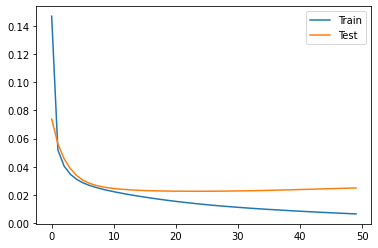

In [ ]:
# Training loss ( train) is the error on the training set of data. 
# Validation loss (test) is the error after running the validation set of data through the trained network.

pyplot.plot(history.history['loss'], label='Train')
pyplot.plot(history.history['val_loss'], label='Test')
pyplot.legend()
pyplot.show()

#plt.plot(history.history['loss'], label='Training loss')
#plt.plot(history.history['val_loss'], label='Validation loss')
#plt.legend()

In [ ]:
#sca=DataFrame(scaled)
#sca.head()

In [ ]:
lstm_test_mse = model.evaluate(X_Test, Y_Test, batch_size=1)
print('Test MSE:',lstm_test_mse)


338/338 [==============================] - 1s 2ms/step - loss: 0.0249 - Accuracy: 0.0000e+00
Test MSE: [0.0248793363571167, 0.0]


In [ ]:
from sklearn.metrics import r2_score
y_pred_test_lstm = model.predict(X_Test)      # 0.993= 99% percent this means that there is 99 percent less vairation around the line than the mean, in other words the size weight relationship accounts for 99 percent of the total vairation.
y_train_pred_lstm = model.predict(X_Train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(Y_Train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_Test, y_pred_test_lstm)))

The R2 score on the Train set is:	0.993
The R2 score on the Test set is:	0.972


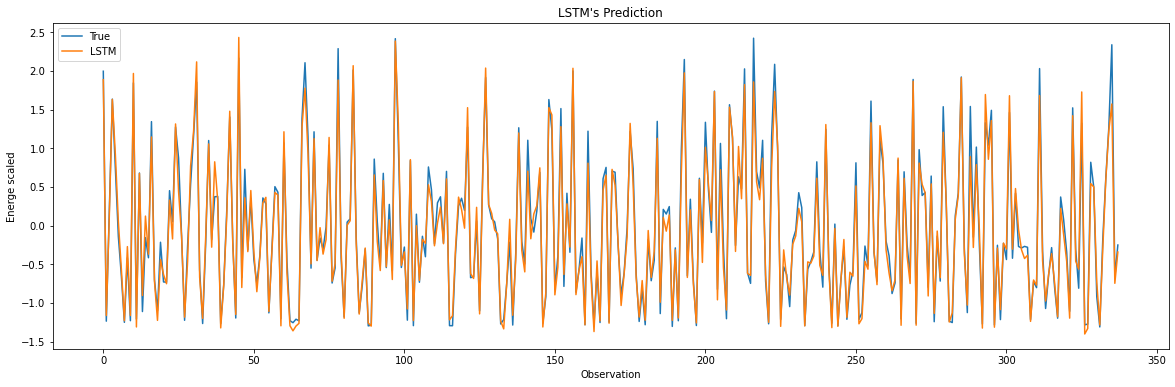

In [ ]:
lstm_y_pred_test = model.predict(X_Test)
plt.figure(figsize=(20, 6))
plt.plot(Y_Test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Energe scaled')
plt.legend()
plt.show();

In [ ]:
print(model.summary)

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f420ae32390>>


In [ ]:
# make a prediction
#print(X_Test)
yhat = lstm_y_pred_test #model.predict(X_Test)
print(X_Test.shape)
X_Test = X_Test.reshape((X_Test.shape[0], 29))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, X_Test[:, -29:]), axis=1)
#print("inv_yhat:",inv_yhat)
####
scaler = MinMaxScaler(feature_range=(0, 1)).fit(inv_yhat)
scaler.inverse_transform(inv_yhat)
####
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
Y_Test = Y_Test.reshape((len(Y_Test), 1))
inv_y = np.concatenate((Y_Test, X_Test[:, -29:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

(338, 1, 29)
Test RMSE: 0.605


In [ ]:
test_val=np.array([1.182868,5.258246])